In [1]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
mpg_df = pd.read_csv("car-mpg.csv")  

In [3]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [4]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [5]:
mpg_df['hp']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [11]:
mpg_df['hp'].isna().value_counts()

hp
False    398
Name: count, dtype: int64

In [18]:
mpg_df['hp'].str.isdigit().value_counts()

hp
True     392
False      6
Name: count, dtype: int64

In [21]:
mpg_df['hp'].str.isdigit().sum()

392

In [30]:
mpg_df['hp'].str.isdigit().value_counts()[False]

6

In [31]:
false=mpg_df[-mpg_df['hp'].str.isdigit()]

In [32]:
false

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [34]:
mpg_df['hp']=mpg_df['hp'].replace('?',np.nan)

In [48]:
median_hp=mpg_df['hp'].median()

In [49]:
median_hp

93.5

In [50]:
mpg_df['hp']=mpg_df['hp'].fillna(median_hp)

In [52]:
mpg_df['hp'].isna().value_counts()

hp
False    398
Name: count, dtype: int64

In [56]:
mpg_df['hp'] = mpg_df['hp'].astype(float)

In [57]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [64]:
mpg_df=mpg_df.drop('car_name',axis=1)

In [65]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [69]:
mpg_df['car_type'].value_counts()

car_type
1    211
0    187
Name: count, dtype: int64

In [71]:
mpg_df['origin']=mpg_df['origin'].replace({1:'america',2:'europe',3:'asia'})

In [75]:
mpg_df['origin'].value_counts().sort_values(ascending=True)

origin
europe      70
asia        79
america    249
Name: count, dtype: int64

In [76]:
mpg_df['origin'].value_counts().sort_index

<bound method Series.sort_index of origin
america    249
asia        79
europe      70
Name: count, dtype: int64>

In [79]:
mpg_df=pd.get_dummies(mpg_df,columns=["origin"])

In [80]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,True,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,1,False,False,True
395,32.0,4,135.0,84.0,2295,11.6,82,1,True,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,1,True,False,False


In [92]:
X=mpg_df.drop('mpg',axis=1)
y=mpg_df[['mpg']]

In [94]:
from sklearn import preprocessing
X_scaled= preprocessing.scale(X)

In [95]:
X_scaled[:3]

array([[ 1.49819126,  1.0906037 ,  0.67311762,  0.63086987, -1.29549834,
        -1.62742629, -1.06223455,  0.77355903, -0.49764335, -0.46196822],
       [ 1.49819126,  1.5035143 ,  1.58995818,  0.85433297, -1.47703779,
        -1.62742629, -1.06223455,  0.77355903, -0.49764335, -0.46196822],
       [ 1.49819126,  1.19623199,  1.19702651,  0.55047045, -1.65857724,
        -1.62742629, -1.06223455,  0.77355903, -0.49764335, -0.46196822]])

In [96]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [97]:
X_scaled

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [98]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [99]:
y_scaled=preprocessing.scale(y)

In [101]:
y_scaled=pd.DataFrame(y_scaled,columns=y.columns)

In [102]:
y_scaled

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y_scaled,test_size=0.30,random_state=1)

In [105]:
from sklearn.linear_model import LinearRegression
Regression_model=LinearRegression()

In [106]:
Regression_model.fit(X_train,y_train)

LinearRegression()

In [119]:
Regression_model.coef_[0]

array([ 0.32102239,  0.32483431, -0.2291695 , -0.71121019,  0.01471368,
        0.37558119,  0.38147695, -0.07472248,  0.04451525,  0.04834855])

In [118]:
Regression_model.intercept_[0]

0.019284116103639715

In [122]:
y_pred = Regression_model.predict(X_test)
y_pred[:5]

array([[-0.53114626],
       [ 0.58000872],
       [-0.28618227],
       [ 0.60691934],
       [-0.10856958]])

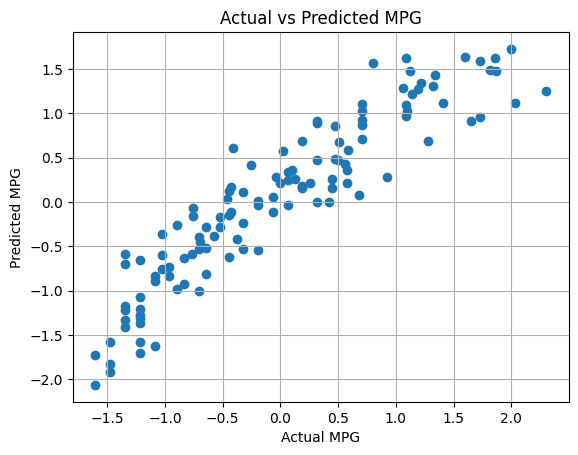

In [129]:
plt.scatter(y_test, Regression_model.predict(X_test))
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)
plt.show()


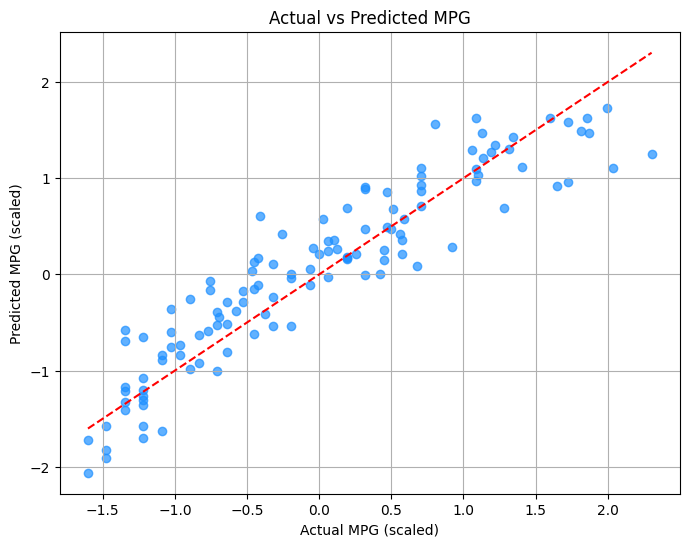

In [130]:
import matplotlib.pyplot as plt

y_pred = Regression_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual MPG (scaled)')
plt.ylabel('Predicted MPG (scaled)')
plt.title('Actual vs Predicted MPG')
plt.grid(True)
plt.show()


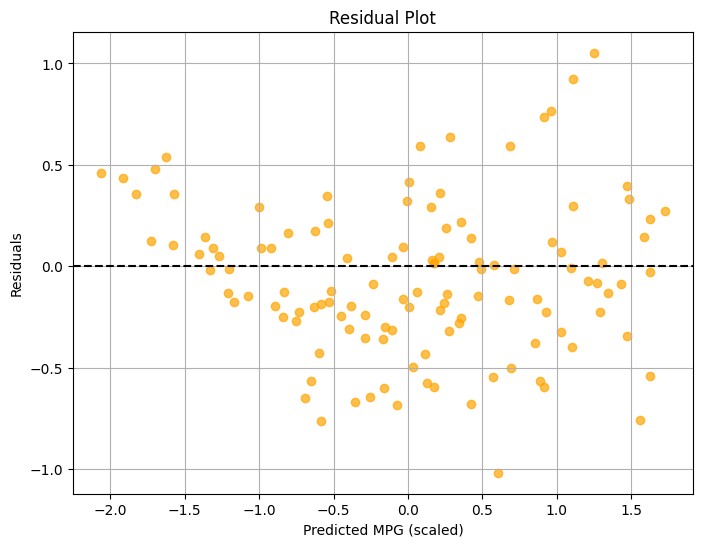

In [131]:
residuals = y_test.values.flatten() - y_pred.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='orange', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted MPG (scaled)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


In [135]:
Regression_model.score(X_train,y_train)

0.8343770256960538

In [136]:
Regression_model.score(X_test,y_test)

0.8513421387780067

#### Overfitting

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mae=mean_absolute_error(y_test,y_pred)
mae

0.2972512778945195

In [141]:
mse=mean_squared_error(y_test,y_pred)
mse

0.14263413229525929

In [142]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.3776693425408783

In [143]:
r2Score = r2_score(y_test, y_pred)
r2Score

0.8513421387780067

In [145]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)

Ridge(alpha=0.3)

In [147]:
ridge.coef_[0]

array([ 0.31649043,  0.31320707, -0.22876025, -0.70109447,  0.01295851,
        0.37447352,  0.37725608, -0.07423624,  0.04441039,  0.04784031])

In [150]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso.coef_


array([-0.        , -0.        , -0.01690287, -0.51890013,  0.        ,
        0.28138241,  0.1278489 , -0.01642647,  0.        ,  0.        ])

In [152]:
print(Regression_model.score(X_train, y_train))
print(Regression_model.score(X_test, y_test))


0.8343770256960538
0.8513421387780067


In [153]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8343617931312617
0.8518882171608501


In [154]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7938010766228453
0.8375229615977084


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



📊 RidgeCV (Best alpha: 1.000)
Train R²: 0.8342
Test R²:  0.8530
MSE:      0.1411
MAE:      0.2947
RMSE:     0.3756

📊 LassoCV (Best alpha: 0.010)
Train R²: 0.8261
Test R²:  0.8587
MSE:      0.1356
MAE:      0.2859
RMSE:     0.3682


C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


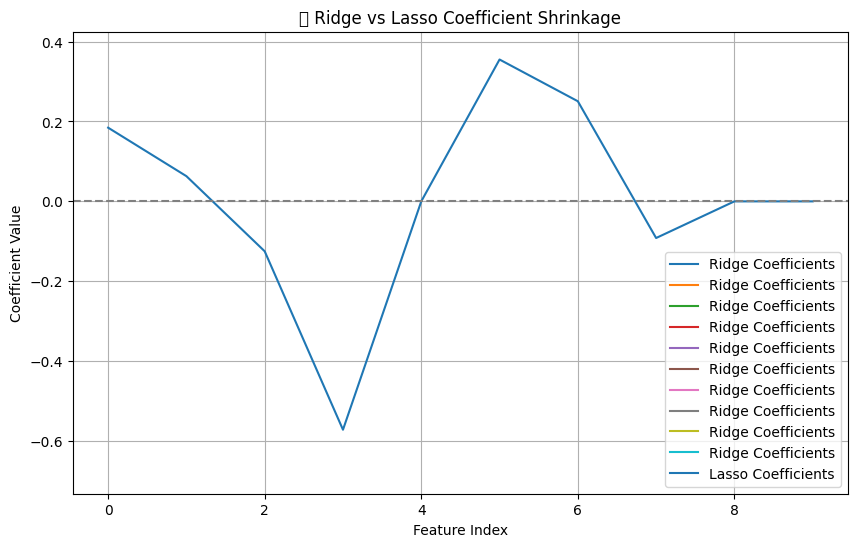

In [155]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Define alpha values to search
alphas = [0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 10]

# 2. Fit RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# 3. Fit LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# 4. Predict
ridge_pred = ridge_cv.predict(X_test)
lasso_pred = lasso_cv.predict(X_test)

# 5. Evaluate
def eval_model(name, model, y_true, y_pred):
    print(f"\n📊 {name} (Best alpha: {model.alpha_:.3f})")
    print(f"Train R²: {model.score(X_train, y_train):.4f}")
    print(f"Test R²:  {model.score(X_test, y_test):.4f}")
    print(f"MSE:      {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE:      {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE:     {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

eval_model("RidgeCV", ridge_cv, y_test, ridge_pred)
eval_model("LassoCV", lasso_cv, y_test, lasso_pred)

# 6. Coefficient plot
plt.figure(figsize=(10, 6))
plt.plot(ridge_cv.coef_, label='Ridge Coefficients')
plt.plot(lasso_cv.coef_, label='Lasso Coefficients')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title('📉 Ridge vs Lasso Coefficient Shrinkage')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



📊 RidgeCV (Best alpha: 1.000)
Train R²: 0.8342
Test R²:  0.8530
MSE:      0.1411
MAE:      0.2947
RMSE:     0.3756

📊 LassoCV (Best alpha: 0.010)
Train R²: 0.8261
Test R²:  0.8587
MSE:      0.1356
MAE:      0.2859
RMSE:     0.3682


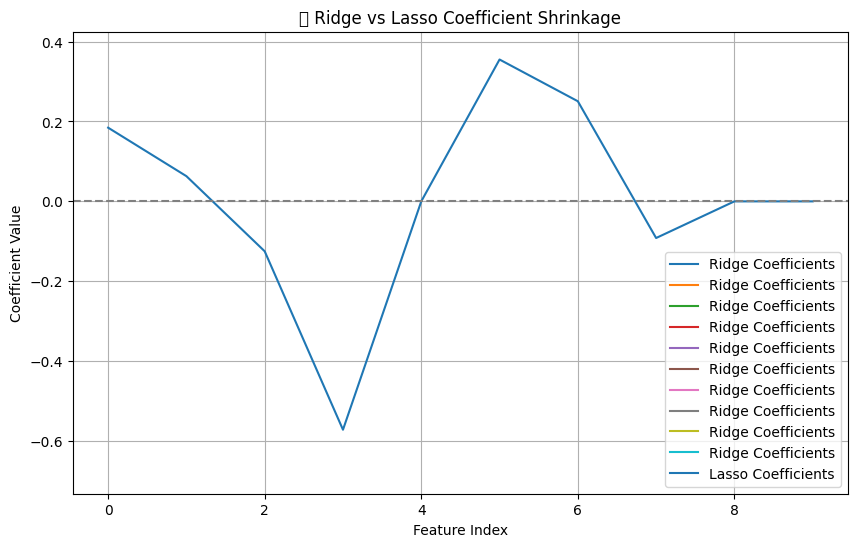

In [159]:

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Define alpha values to search
alphas = [0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 10]

# 2. Fit RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

# 3. Fit LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# 4. Predict
ridge_pred = ridge_cv.predict(X_test)
lasso_pred = lasso_cv.predict(X_test)

# 5. Evaluate
def eval_model(name, model, y_true, y_pred):
    print(f"\n📊 {name} (Best alpha: {model.alpha_:.3f})")
    print(f"Train R²: {model.score(X_train, y_train):.4f}")
    print(f"Test R²:  {model.score(X_test, y_test):.4f}")
    print(f"MSE:      {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE:      {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE:     {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

eval_model("RidgeCV", ridge_cv, y_test, ridge_pred)
eval_model("LassoCV", lasso_cv, y_test, lasso_pred)

# 6. Coefficient plot
plt.figure(figsize=(10, 6))
plt.plot(ridge_cv.coef_, label='Ridge Coefficients')
plt.plot(lasso_cv.coef_, label='Lasso Coefficients')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title('📉 Ridge vs Lasso Coefficient Shrinkage')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()



In [160]:
from sklearn.preprocessing import PolynomialFeatures

In [162]:
poly=PolynomialFeatures(degree=2,interaction_only=True)

In [163]:
X_poly=poly.fit_transform(X_scaled)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)


In [166]:
X_train.shape

(278, 56)

In [168]:
Regression_model.fit(X_train, y_train)

LinearRegression()

In [170]:
print(Regression_model.coef_[0])


[-9.67853872e-13  2.43475876e+11 -4.44312847e+00 -2.19804536e+00
 -2.94630117e+00 -1.53215886e+00  3.01817815e+00  3.24183131e+11
  1.31405081e+11 -7.48824208e+11  5.87392611e+11 -1.29207993e+00
 -1.09856033e+00 -1.67337418e-01  2.86777115e+00 -1.98967361e+00
  7.80056893e+11  1.31296704e+12  4.58697148e+11  4.37827558e+11
  3.80264282e-01  1.64630890e-01 -5.51589966e-01  3.48147583e+00
 -2.04401588e+00  2.22692647e+11  1.83536294e+11  1.75185845e+11
  1.68792725e-01 -6.13784790e-01 -1.88859558e+00 -5.19851685e-01
  3.50879506e+10  2.89183881e+10  2.76026727e+10 -1.97967529e-01
  5.17349243e-01 -3.59152222e+00 -3.34853330e+11 -2.75975610e+11
 -2.63419400e+11  5.06744385e-01  1.80518341e+00 -5.72875847e+10
 -4.72146302e+10 -4.50664809e+10  3.69010925e-01  4.19645739e+09
  3.45858853e+09  3.30123128e+09  2.07043942e+11 -1.95649117e+11
 -1.86747565e+11 -1.55960920e+10  1.01773462e+12 -5.77652921e+11]


In [171]:
print(Regression_model.score(X_train, y_train))
print(Regression_model.score(X_test, y_test))


0.9150503098347964
0.858800402386489


In [172]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          3.73512981 -2.93500874 -2.13974194 -3.56547812 -1.28898893
   3.01290805  2.04739082  0.0786974   0.21972225 -0.3302341  -1.46231096
  -1.17221896  0.00856067  2.48054694 -1.67596093  0.99537516 -2.29024279
   4.7699338  -2.08598898  0.34009408  0.35024058 -0.41761834  3.06970569
  -2.21649433  1.86339518 -2.62934278  0.38596397  0.12088534 -0.53440382
  -1.88265835 -0.7675926  -0.90146842  0.52416091  0.59678246 -0.26349448
   0.5827378  -3.02842915 -0.36548074  0.5956112  -0.15941014  0.49168856
   1.45652375 -0.43819158 -0.20964198  0.77665496  0.36489921 -0.4750838
   0.3551047   0.23188557 -1.42941282  2.06831543 -0.34986402 -0.32320394
   0.39054656  0.06283411]]


In [173]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.914322570200336
0.8613398053698491


In [174]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.52263805 -0.5402102  -1.99423315 -4.55360385 -0.85285179
  2.99044036  0.00711821 -0.          0.76073274 -0.         -0.
 -0.19736449  0.          2.04221833 -1.00014513  0.         -0.
  4.28412669 -0.          0.          0.31442062 -0.          2.13894094
 -1.06760107  0.         -0.          0.          0.         -0.44991392
 -1.55885506 -0.         -0.68837902  0.          0.17455864 -0.34653644
  0.3313704  -2.84931966  0.         -0.34340563  0.00815105  0.47019445
  1.25759712 -0.69634581  0.          0.55528147  0.2948979  -0.67289549
  0.06490671  0.         -1.19639935  1.06711702  0.         -0.88034391
  0.         -0.        ]


In [175]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9098286193898273
0.8695296858772454
